In [1]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
np.random.seed(2)

def PHI(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)


def PSI(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return -K*np.exp(-r*T)*norm.cdf(d2)


def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

def StockPrice(S, r, T, sigma, W_T):
    return S*np.exp((r-sigma**2/2)*T + sigma*W_T)

def HedgingError(S0, K, r, sigma, maturity, t, W_T):
    S = pd.DataFrame(StockPrice(S0, r, t, sigma, W_T))
    phi = pd.DataFrame(PHI(S, K, r, sigma, maturity - t))
    psib = pd.DataFrame(PSI(S, K, r, sigma, maturity - t))
    hedging_error = pd.DataFrame(phi.values[:,:-1]*np.diff(S) + psib.values[:,:-1]*r*(dt))
    hedging_error['Sum'] = hedging_error.apply(np.sum, axis = 1)
    payoff = np.maximum(S-K, 0)
    call_option = BlackScholesCall(S0, K, r, sigma, maturity)
    final_PL = hedging_error['Sum'].values + call_option - payoff.iloc[:,-1]
    return final_PL

In [2]:
paths = 50_000
maturity = 1/12
r = 0.05
S0 = 100.0
K = 100.0
sigma = 0.2

In [3]:
steps = 21
dt = maturity / steps
T, W_T = simulate_Brownian_Motion(paths, steps, maturity)
N_21_errors = HedgingError(S0, K, r, sigma, maturity, T, W_T)

In [4]:
steps = 84
dt = maturity / steps
T, W_T = simulate_Brownian_Motion(paths, steps, maturity)
N_84_errors = HedgingError(S0, K, r, sigma, maturity, T, W_T)

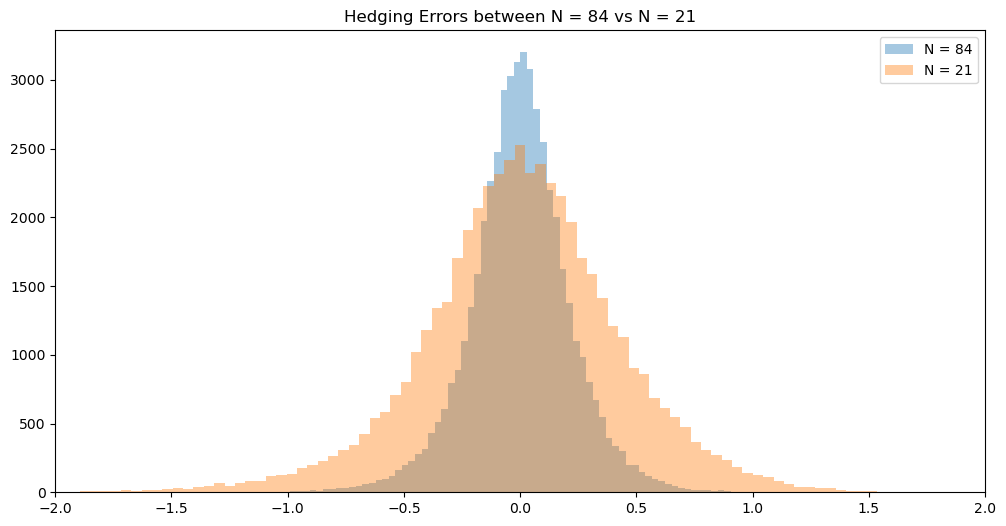

In [5]:
plt.figure(figsize = (12,6))
plt.hist(N_84_errors, bins = 100, alpha = 0.4)
plt.hist(N_21_errors, bins = 100, alpha = 0.4)
plt.legend(["N = 84", "N = 21"])
plt.xlim([-2,2])
plt.title("Hedging Errors between N = 84 vs N = 21")
plt.savefig("84vs21.png")
plt.show()